# Spatial Join Node
2 -> 1

Documentation: http://geopandas.org/mergingdata.html#spatial-joins

Samenvoegen met een spatial join (```sjoin```) is vergelijkbaar als tabellen joinen, maar dan op geografisch niveau.

In [39]:
# add this in KNIME
# spatial join node
import geopandas as gpd
import pandas as pd
from shapely import wkt

# geopandas (geometry) to pandas (wkt)
def gdfToDf(gdf):
    df = pd.DataFrame(gdf, copy=True)
    df['wkt'] = gdf.geometry.apply(wkt.dumps)
    df.drop(columns='geometry', inplace=True)
    return df

# pandas (wkt) to geopandas (geometry)
def dfToGdf(df):
    gdf = gpd.GeoDataFrame(df, copy=True)
    gdf['geometry'] = df.wkt.apply(wkt.loads)
    gdf.drop(columns='wkt', inplace=True)
    return gdf

# input
gdf1 = dfToGdf(input_table_1)
print('Shape input_table_1:', input_table_1.shape)
gdf2 = dfToGdf(input_table_2)
print('Shape input_table_2:', input_table_2.shape)

# spatial join. Which points of gdf2 fall within the polygon of gdf1?
gdf = gpd.sjoin(gdf2, gdf1, how='inner', op='within')

# output
output_table = gdfToDf(gdf)
print('\nShape output_table:', output_table.shape)
print('\nPreview:\n', output_table.head())

Shape input_table_1: (12, 3)
Shape input_table_2: (1477, 4)

Shape output_table: (1477, 7)

Preview:
    id_left       Plaatsnaam  Grootte  index_right  id_right provincien  \
0      1.0      Roodeschool        6            1         2  Groningen   
1      2.0  Uithuizermeeden        7            1         2  Groningen   
2      3.0        Uithuizen        7            1         2  Groningen   
3      4.0          Usquert        6            1         2  Groningen   
4      5.0          Warffum        6            1         2  Groningen   

                                              wkt  
0  POINT (6.7666239795133114 53.4213203002016002)  
1  POINT (6.7263901702975364 53.4154547008197511)  
2  POINT (6.6724923053616827 53.4070139338652865)  
3  POINT (6.6134716615014231 53.4035668140993209)  
4  POINT (6.5573087455878882 53.3937435818452286)  


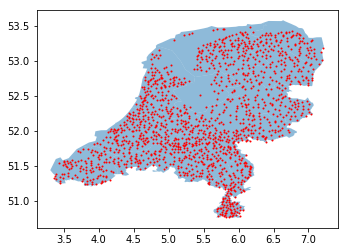

In [50]:
# dont add this in KNIME
%matplotlib inline
ax1 = gdf1.plot(alpha=0.5)
gdf2.plot(ax=ax1, color='red', markersize=1)

,id_left,Plaatsnaam,Grootte,geometry,index_right,id_right,provincien
967,NaN,Maastricht,13,POINT (5.690778716527054 50.85131496907814),9,10,Limburg
937,NaN,Venlo,12,POINT (6.168875506462413 51.36836536233175),9,10,Limburg
968,NaN,Heerlen,12,POINT (5.973803040331814 50.89493019012449),9,10,Limburg
948,NaN,Roermond,9,POINT (5.989108900963718 51.19332741191549),9,10,Limburg
970,NaN,Landgraaf,9,POINT (6.027523504535814 50.90728906438072),9,10,Limburg


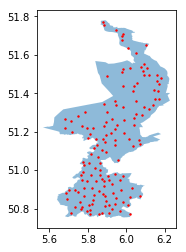

In [51]:
# dont add this in KNIME
provincie = 'Limburg'
ax2 = gdf1[gdf1.provincien == provincie].plot(alpha=0.5)
gdfSelect = gdf[gdf.provincien == provincie]
gdfSelect.plot(ax=ax2, color='red', markersize=2)
gdfSelect.sort_values(by='Grootte', ascending=False).head()

## Load some input data to test the cells above
**Input table 1:** Provincies (polygons)

In [37]:
# dont add this in KNIME
# source node
import geopandas as gpd
import pandas as pd
from shapely import wkt

# geopandas (geometry) to pandas (wkt)
def gdfToDf(gdf):
    df = pd.DataFrame(gdf, copy=True)
    df['wkt'] = gdf.geometry.apply(wkt.dumps)
    df.drop(columns='geometry', inplace=True)
    return df

# specify folder and filename (*.shp)
from os.path import join
folder = '/home/ab/i/Open-data/shapefiles/shp-provincie-zonder-kustlijn'
filename = 'provincie.shp'
gdf = gpd.read_file( join(folder, filename) )
print('File read from:', join(folder, filename))

# re-project to coordinate reference system (CRS) - always do this?
gdf = gdf.to_crs(epsg=4326)

# output
output_table = gdfToDf(gdf)
print('\nShape:', output_table.shape)
print('\nPreview:\n', output_table.head())

File read from: /home/ab/i/Open-data/shapefiles/shp-provincie-zonder-kustlijn/provincie.shp

Shape: (12, 3)

Preview:
    id     provincien                                                wkt
0   1  Noord-Holland  POLYGON ((4.5943904365598476 52.57651806753898...
1   2      Groningen  POLYGON ((6.2875477038168262 53.34250993573775...
2   3     Overijssel  POLYGON ((6.1101213184195107 52.44155311970717...
3   4        Zeeland  POLYGON ((3.4860788558341187 51.57454376790719...
4   5      Friesland  POLYGON ((5.0874545170217562 53.32419730632847...


In [23]:
# dont add this in KNIME
input_table_1 = output_table.copy()

**Input table 2:** Woonplaatsen (points)

In [31]:
# dont add this in KNIME
# source node

# specify folder and filename (*.shp)
from os.path import join
folder = '/home/ab/i/Open-data/shapefiles/shp-woonplaats'
filename = 'woonplaats-point.shp'
gdf = gpd.read_file( join(folder, filename) )
print('File read from:', join(folder, filename))

# re-project to coordinate reference system (CRS) - always do this?
gdf = gdf.to_crs(epsg=4326)

# voor nu, gooi even de gemeenten en provincie info weg
gdf.drop(columns={'Gemeente', 'Provincie'}, inplace=True)

# output
output_table = gdfToDf(gdf)
print('\nShape:', output_table.shape)
print('\nPreview:\n', output_table.head())

File read from: /home/ab/i/Open-data/shapefiles/shp-woonplaats/woonplaats-point.shp

Shape: (1477, 4)

Preview:
     id       Plaatsnaam  Grootte  \
0  1.0      Roodeschool        6   
1  2.0  Uithuizermeeden        7   
2  3.0        Uithuizen        7   
3  4.0          Usquert        6   
4  5.0          Warffum        6   

                                              wkt  
0  POINT (6.7666239795133114 53.4213203002016002)  
1  POINT (6.7263901702975364 53.4154547008197511)  
2  POINT (6.6724923053616827 53.4070139338652865)  
3  POINT (6.6134716615014231 53.4035668140993209)  
4  POINT (6.5573087455878882 53.3937435818452286)  


In [32]:
# dont add this in KNIME
input_table_2 = output_table.copy()